In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
bad_songs = pd.read_csv('datasets/bad_cleaned2.csv')
bad_songs.dropna(inplace=True)
bad_songs
#see this?

,artist,song,lyrics
0,YG,BAND DRUM (feat. A$AP Rocky),I mix the 4Hunnid with the designer Stay lace...
1,Chris Cooq,Lactose,I came to rule this stage with that Budden swa...
2,Chris Cooq,Same - Original mix,Gorillaz - Song Machine Episode 7 - 4/4 mxmto...
3,Curbo,Debauchery - Original mix,"Learning is, indeed, a very great and a very..."
4,G Herbo,Bon appétit,"Young nigga eatin', uh, bon appetit, uh Messe..."
...,...,...,...
3473,The Nurseries,If You're Happy and You Know It,“I wish you would manage the time to come in...
3474,The Nurseries,Row Row Row Your Boat,And black are the waters that sparkled so gree...
3475,The Nurseries,Mary Had a Little Lamb,"BOOK I. THE SOFA. [""The history of..."
3476,Nathan K.,If I Die,"Yes sir, know what I'm talkin' 'bout? Legenda..."


In [8]:
good_songs = pd.read_csv('datasets/good_cleaned.csv')
good_songs = good_songs[['lyrics']].copy()
good_songs

,lyrics
0,sam the sham miscellaneous wooly bully wooly b...
1,sugar pie honey bunch you know that i love yo...
2,when i woke up this morning you were on my mi...
3,you never close your eyes anymore when i kiss...
4,when youre alone and life is making you lonel...
...,...
4861,my face above the water my feet cant touch th...
4862,enrique iglesias dime si es verdad me dijeron ...
4863,going out tonight changes into something red ...
4864,oh man oh man oh man not againyeah i learned ...


In [9]:
'''splitting'''
from sklearn.model_selection import train_test_split

# Combine the two dataframes into one
main = pd.concat([good_songs, bad_songs], ignore_index=True)

# Create a new column 'label' with 1 for good songs and 0 for bad songs
main['label'] = (main['lyrics'].isin(good_songs['lyrics'])) * 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(main['lyrics'], main['label'], test_size=0.2, random_state=42)

y_test = y_test.values.reshape(-1, 1)

In [10]:
'''applying bag of words'''

# Create a CountVectorizer object
vect = CountVectorizer() #(min_df=5)

text_train = vect.fit_transform(X_train)
text_test = vect.transform(X_test)

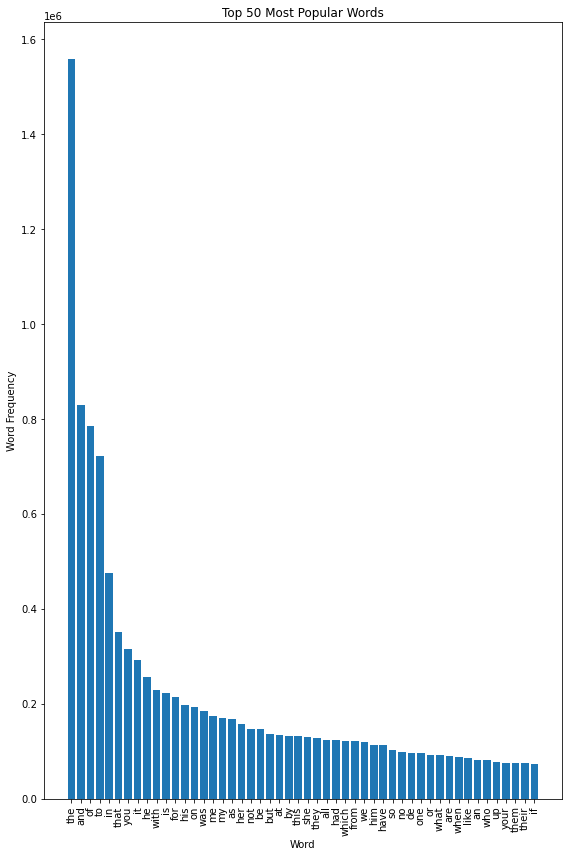

In [47]:
# Get the feature names from the CountVectorizer
feature_names = vect.get_feature_names()

# Calculate the word frequencies in the training set
word_frequencies = X_train_bow.sum(axis=0).A1

# Get the indices of the top 50 most frequent words
top_indices = word_frequencies.argsort()[-50:][::-1]  # Reverse the order

# Get the corresponding word labels
top_words = [feature_names[idx] for idx in top_indices]

# Plot the bar chart with switched axes and reversed order
plt.figure(figsize=(8, 12))
plt.bar(range(len(top_words)), word_frequencies[top_indices], align='center')
plt.xticks(range(len(top_words)), top_words, rotation=90)
plt.ylabel('Word Frequency')
plt.xlabel('Word')
plt.title('Top 50 Most Popular Words')
plt.tight_layout()
plt.show()


In [11]:
print("text_train:\n{}".format(repr(text_train)))
#shape of our text_train is 8106x327664 - vocabulary contains 327664 entries (features) stored as SciPy sparse matrix
#shape after constraint to have appearance in at least 5 documents, shrinks to 108184 features

text_train:
<6675x278978 sparse matrix of type '<class 'numpy.int64'>'
	with 3696204 stored elements in Compressed Sparse Row format>


In [12]:
# Create a logistic regression object and fit the model on the training data
lr = LogisticRegression()
lr.fit(text_train, y_train)

# Evaluate the model on the test data
score = lr.score(text_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9886159376872379


c:\Users\kubad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
